----------------------HOUSE PRICE PREDICTION USING MACHINE LEARNING--------------------------

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv(r'D:\New folder\HousingPrices-Amsterdam.csv')
df.head(8)

,Address,Zip,Price,Area,Room,Lon,Lat
0,"Blasiusstraat 8 2, Amsterdam",1091 CR,685000.0,64,3,4.907736,52.356157
1,"Kromme Leimuidenstraat 13 H, Amsterdam",1059 EL,475000.0,60,3,4.850476,52.348586
2,"Zaaiersweg 11 A, Amsterdam",1097 SM,850000.0,109,4,4.944774,52.343782
3,"Tenerifestraat 40, Amsterdam",1060 TH,580000.0,128,6,4.789928,52.343712
4,"Winterjanpad 21, Amsterdam",1036 KN,720000.0,138,5,4.902503,52.410538
5,"De Wittenkade 134 I, Amsterdam",1051 AM,450000.0,53,2,4.875024,52.382228
6,"Pruimenstraat 18 B, Amsterdam",1033 KM,450000.0,87,3,4.896536,52.410585
7,"Da Costakade 32 II, Amsterdam",1053 WL,590000.0,80,2,4.871555,52.371041


In [3]:
df.columns

Index(['Address', 'Zip', 'Price', 'Area', 'Room', 'Lon', 'Lat'], dtype='object')

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3

In [5]:
df.describe()

,Price,Area,Room,Lon,Lat
count,9.200000e+02,924.000000,924.000000,924.000000,924.000000
mean,6.220654e+05,95.952381,3.571429,4.888605,52.363326
std,5.389942e+05,57.447436,1.592332,0.053140,0.024028
min,1.750000e+05,21.000000,1.000000,4.644819,52.291519
25%,3.500000e+05,60.750000,3.000000,4.855834,52.352077
50%,4.670000e+05,83.000000,3.000000,4.886818,52.364631
75%,7.000000e+05,113.000000,4.000000,4.922337,52.377598
max,5.950000e+06,623.000000,14.000000,5.029122,52.423805


In [6]:
#Cleaning the Dataset

In [7]:
df.isnull().sum()

Address    0
Zip        0
Price      4
Area       0
Room       0
Lon        0
Lat        0
dtype: int64

<AxesSubplot:>

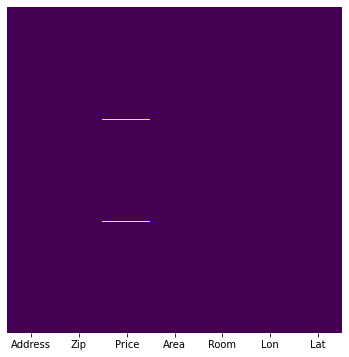

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
df = df.dropna()

In [10]:
#Pre-Processsing the Dataset

In [11]:
postal_code_district = pd.DataFrame(np.array([
    [1011, 1018, 1], [1019, 1019, 2], [1020, 1029, 3],
    [1030, 1039, 4], [1040, 1049, 5], [1050, 1059, 6], 
    [1060, 1069, 7], [1070, 1083, 8], [1086, 1099, 9], 
    [1100, 1108, 10], [1109, 1109, 11]]), 
    columns = ['under', 'upper', 'dstrct_id'])

postal_code_district

,under,upper,dstrct_id
0,1011,1018,1
1,1019,1019,2
2,1020,1029,3
3,1030,1039,4
4,1040,1049,5
5,1050,1059,6
6,1060,1069,7
7,1070,1083,8
8,1086,1099,9
9,1100,1108,10


In [12]:
df['temp'] = df['Zip'].apply( lambda x: int(float((x.split(' ', 1)[0]))))
df['district'] = df['temp'].apply( lambda x: postal_code_district.loc[(postal_code_district['under'] <= x) & (postal_code_district['upper'] >= x), 'dstrct_id'].values[0])

In [13]:
df = df.drop(['Zip', 'Address', 'temp'], axis=1)

In [14]:
df.head()

,Price,Area,Room,Lon,Lat,district
0,685000.0,64,3,4.907736,52.356157,9
1,475000.0,60,3,4.850476,52.348586,6
2,850000.0,109,4,4.944774,52.343782,9
3,580000.0,128,6,4.789928,52.343712,7
4,720000.0,138,5,4.902503,52.410538,4


In [40]:
#Visualization of Dataset

<Figure size 1008x1008 with 0 Axes>

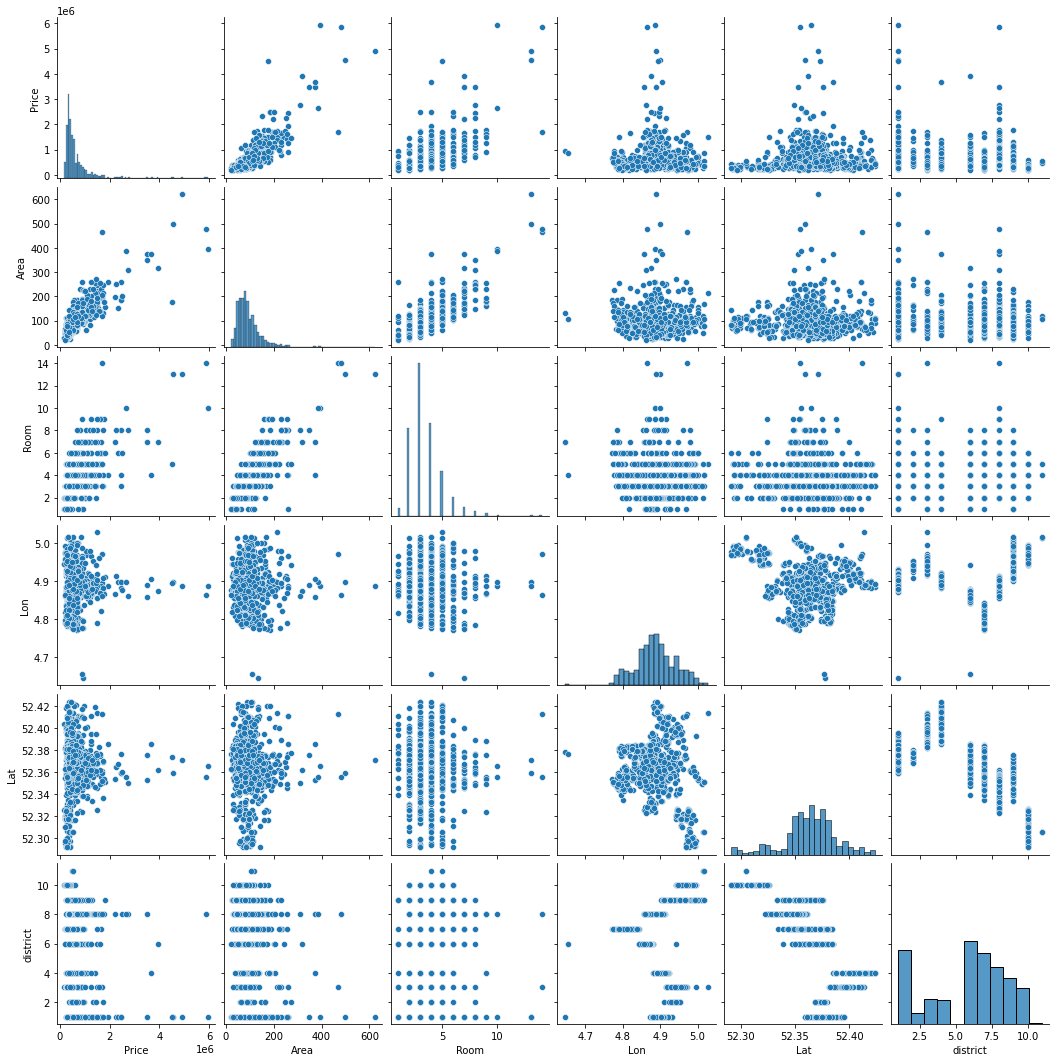

In [41]:
plt.figure(figsize=(14,14))
sns.pairplot(df)

<AxesSubplot:>

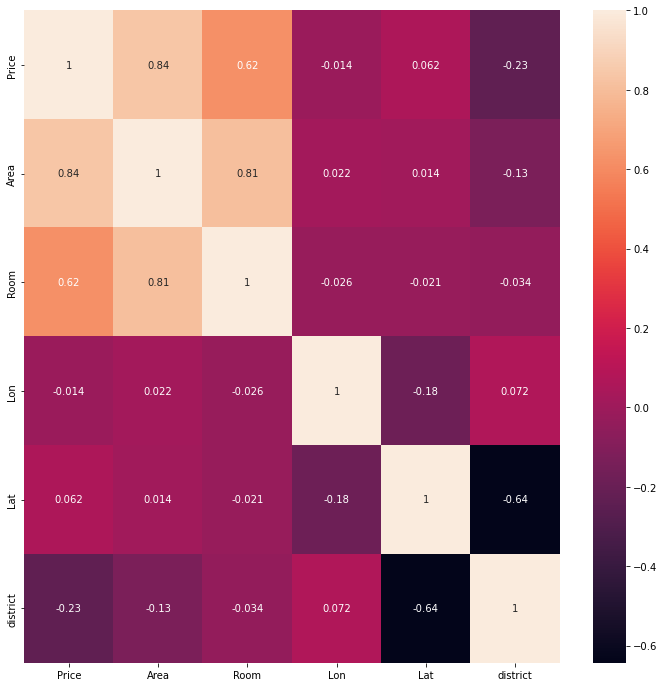

In [17]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(), annot = True)

In [18]:
df.columns

Index(['Price', 'Area', 'Room', 'Lon', 'Lat', 'district'], dtype='object')

In [19]:
x=df[['Area', 'Room', 'Lon', 'Lat', 'district']]
y=df['Price']

In [23]:
#Training the Dataset

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101,shuffle=True)

In [26]:
lm = LinearRegression()
lm.fit(x_train,y_train)
predictions1 = lm.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [29]:
print(r2_score(y_test,predictions1)*100)
print(mean_squared_error(y_test, predictions1))

74.82444367665568
86225384493.41043


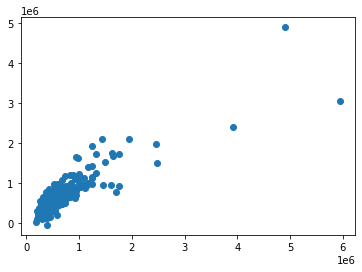

In [30]:
plt.scatter(y_test,predictions1)

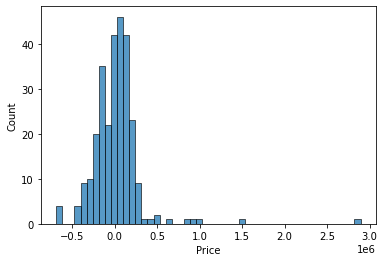

In [31]:
sns.histplot((y_test-predictions1),bins=50);

In [32]:
from sklearn.ensemble import RandomForestRegressor

In [33]:
rm = RandomForestRegressor(n_estimators = 150).fit(x_train, y_train)
predictions2 = rm.predict(x_test)

In [34]:
print(rm.score(x_train, y_train)*100)
print(r2_score(y_test,predictions2)*100)
print(mean_squared_error(y_test, predictions2))

96.2714887827689
82.63997143286656
59457480056.94215


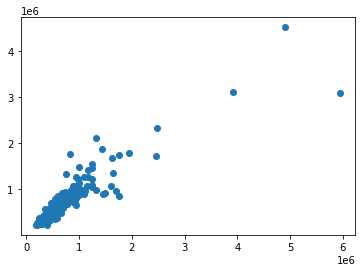

In [35]:
plt.scatter(y_test,predictions2)

In [36]:
#testing the model with Custom Input of arrays

In [44]:
import warnings
warnings.filterwarnings('ignore')
inp=np.array([1000, 3, 4.907736, 52.356157, 9])
inp=inp.reshape((1,-1))

In [45]:
print(lm.predict(inp))

[8309495.11340325]


In [46]:
print(rm.predict(inp))

[4229266.66666667]


In [47]:
df.head(10)

,Price,Area,Room,Lon,Lat,district
0,685000.0,64,3,4.907736,52.356157,9
1,475000.0,60,3,4.850476,52.348586,6
2,850000.0,109,4,4.944774,52.343782,9
3,580000.0,128,6,4.789928,52.343712,7
4,720000.0,138,5,4.902503,52.410538,4
5,450000.0,53,2,4.875024,52.382228,6
6,450000.0,87,3,4.896536,52.410585,4
7,590000.0,80,2,4.871555,52.371041,6
8,399000.0,49,3,4.854671,52.363471,6
9,300000.0,33,2,4.897142,52.353111,8


In [48]:
df.columns

Index(['Price', 'Area', 'Room', 'Lon', 'Lat', 'district'], dtype='object')